## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data_AM_UK=pd.read_csv("../amz_uk_price_prediction_dataset.csv")

In [3]:
data_AM_UK.describe(include="all")

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
count,2.443651e+06,2443651,2443651,2.443651e+06,2.443651e+06,2.443651e+06,2443651,2.443651e+06,2443651
unique,NaN,2222742,2077591,NaN,NaN,NaN,2,NaN,296
top,NaN,B083L94P36,OYhmc Portable Pedal Exerc,NaN,NaN,NaN,False,NaN,Sports & Outdoors
freq,NaN,7,723,NaN,NaN,NaN,2435671,NaN,836265
mean,1.370545e+06,NaN,NaN,2.152836e+00,4.806278e+02,8.924381e+01,NaN,2.589699e+01,NaN
std,8.160562e+05,NaN,NaN,2.194865e+00,5.944124e+03,3.456089e+02,NaN,2.404837e+02,NaN
min,1.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN
25%,6.589215e+05,NaN,NaN,0.000000e+00,0.000000e+00,9.990000e+00,NaN,0.000000e+00,NaN
50%,1.349029e+06,NaN,NaN,0.000000e+00,0.000000e+00,1.909000e+01,NaN,0.000000e+00,NaN
75%,2.060686e+06,NaN,NaN,4.400000e+00,5.900000e+01,4.599000e+01,NaN,0.000000e+00,NaN


### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

In [4]:
#1. **Crosstab Analysis**
crosstab_trend_Pcat =  pd.crosstab(data_AM_UK['isBestSeller'],data_AM_UK['category'])
crosstab_trend_Pcat

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [5]:
#more prevalent categories
cat_best_sel=data_AM_UK[data_AM_UK['isBestSeller'] == True]['category'].value_counts(normalize=True).sort_values(ascending=False)
cat_best_sel.head(11)

category
Grocery                   0.069674
Health & Personal Care    0.069173
Baby                      0.042732
Sports & Outdoors         0.041353
Power & Hand Tools        0.038346
Beauty                    0.037845
Pet Supplies              0.035714
Arts & Crafts             0.028822
Women                     0.026692
Men                       0.021178
PC & Video Games          0.019674
Name: proportion, dtype: float64

In [6]:
category_count = data_AM_UK[data_AM_UK['isBestSeller'] == True]['category'].value_counts(normalize=True).sort_values(ascending=False)

# 4. Select the top 20 categories
top_20_categories = category_count.head(20)

# 5. Convert to a list
top_20_category_list = top_20_categories.index.tolist()

print(top_20_category_list)

['Grocery', 'Health & Personal Care', 'Baby', 'Sports & Outdoors', 'Power & Hand Tools', 'Beauty', 'Pet Supplies', 'Arts & Crafts', 'Women', 'Men', 'PC & Video Games', 'Storage & Organisation', 'Hardware', 'Large Appliances', 'Building Supplies', 'Office Supplies', "Customers' Most Loved", 'Agricultural Equipment & Supplies', 'Gardening', 'Luggage and travel gear']


In [7]:
#Statistical Tests
from scipy.stats import chi2_contingency
# Chi-square test for 'category' and isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_trend_Pcat)
chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [8]:
from scipy.stats.contingency import association
association(crosstab_trend_Pcat, method="cramer")

0.1222829439760564

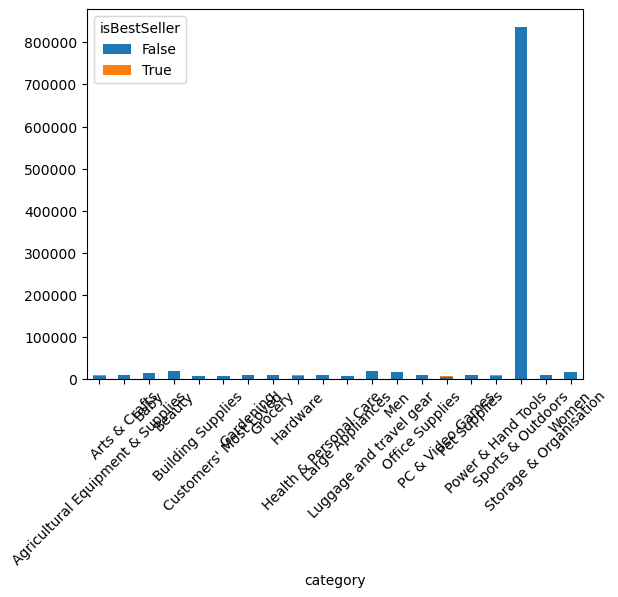

In [9]:
#Barchart representation of the 20 categories with the highest frequency for isBestSeller for better visibility

filtered_data = data_AM_UK[data_AM_UK['category'].isin(top_20_category_list)]
crosstab_result = pd.crosstab(filtered_data['category'], filtered_data['isBestSeller'])
ax = crosstab_result.plot(kind="bar", stacked=True)

# Set x labels to be vertical for better readability
plt.xticks(rotation=45)

plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [10]:
#Preliminary Step: Remove outliers in product prices in 'data_AM_UK'
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers
	
data_series = data_AM_UK['price']  # replace 'ColumnName' with your specific column
outliers = tukeys_test_outliers(data_series)
print(outliers)
data_AM_UK_filt_price=data_AM_UK.iloc[~outliers.index,:]


10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [11]:
data_AM_UK_filt_price.describe()

,uid,stars,reviews,price,boughtInLastMonth
count,3.276880e+05,327688.000000,3.276880e+05,327688.000000,327688.000000
mean,1.394468e+06,2.102896,5.236350e+02,87.816133,23.116043
std,8.159084e+05,2.190320,7.310308e+03,312.083104,268.702255
min,8.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,6.679718e+05,0.000000,0.000000e+00,11.040000,0.000000
50%,1.341614e+06,0.000000,0.000000e+00,21.620000,0.000000
75%,2.062684e+06,4.400000,5.500000e+01,51.620000,0.000000
max,2.828581e+06,5.000000,1.356658e+06,22933.420000,50000.000000


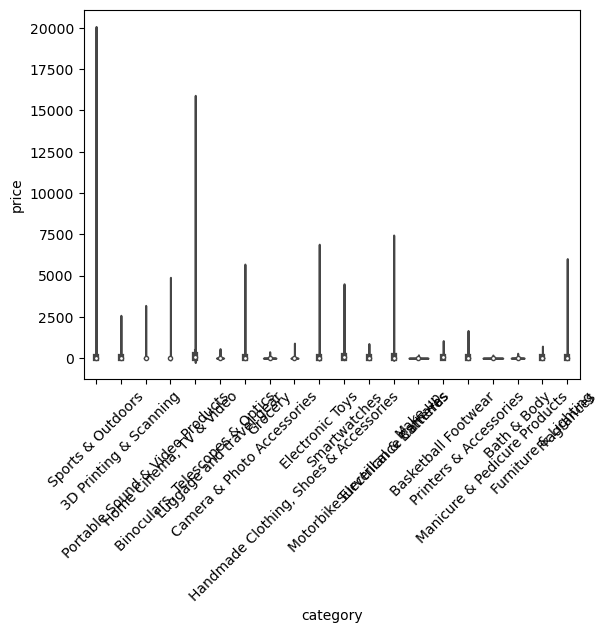

In [12]:
#Violin Plots  
category_counts = data_AM_UK_filt_price['category'].value_counts()
top_20_categories = category_counts.nlargest(20).index
sns.violinplot(x='category', y='price', data=data_AM_UK_filt_price[data_AM_UK_filt_price['category'].isin(top_20_categories)])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [13]:
# max median amongst category
median_price_per_category = data_AM_UK_filt_price.groupby('category')['price'].median()
max_median_category = median_price_per_category.idxmax()
max_median_value = median_price_per_category.max()

print(f"The category with the highest median price is: {max_median_category} with a median price of {max_median_value}")

The category with the highest median price is: Digital Cameras with a median price of 1524.0


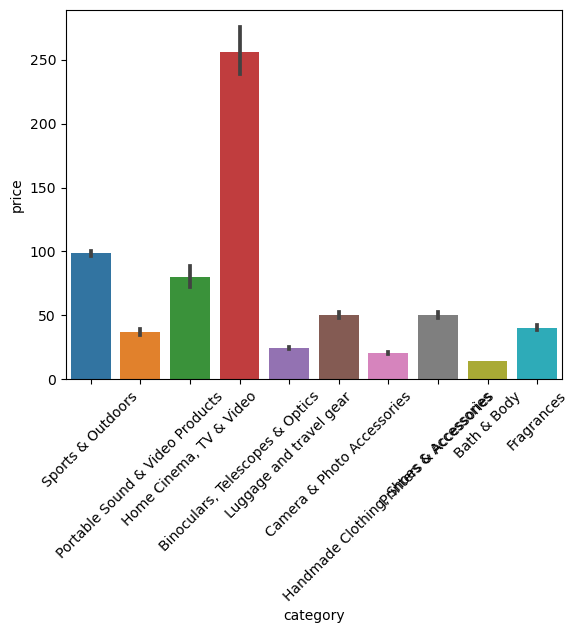

In [14]:
#Bar Charts
category_counts = data_AM_UK_filt_price['category'].value_counts()
top_10_categories = category_counts.nlargest(10).index
sns.barplot(x='category', y='price', data=data_AM_UK_filt_price[data_AM_UK_filt_price['category'].isin(top_10_categories)])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
#Maximal mean
mean_price_per_category = data_AM_UK_filt_price.groupby('category')['price'].mean()
max_mean_category = mean_price_per_category.idxmax()
max_mean_value = mean_price_per_category.max()

print(f"The category with the highest median price is: {max_mean_category} with an average price of {max_mean_value}")

The category with the highest median price is: Digital Cameras with an average price of 1524.0


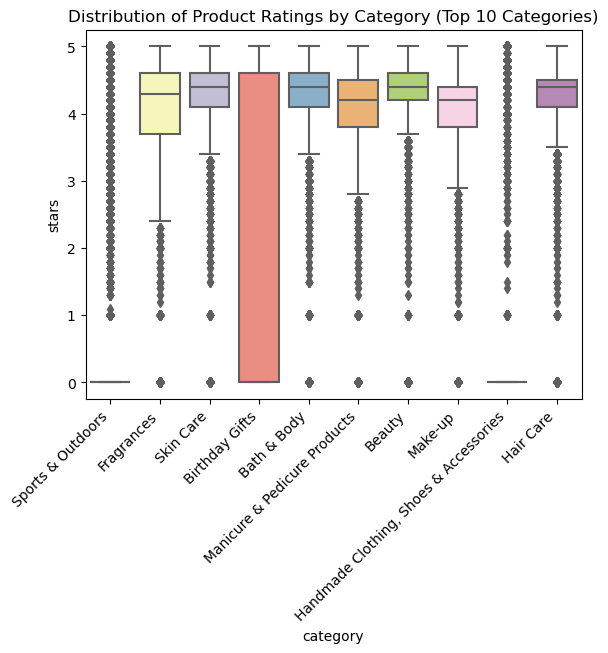

In [16]:
#Box Plots:
# Get the top 10 categories based on the count of products
top_categories = data_AM_UK['category'].value_counts().nlargest(10).index

# Filter data to include only the top 10 categories
filtered_data = data_AM_UK[data_AM_UK['category'].isin(top_categories)]

# Plot side-by-side box plots
#plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filtered_data, palette="Set3")
plt.title('Distribution of Product Ratings by Category (Top 10 Categories)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [17]:

# Group by category and calculate median rating for each category
category_median_ratings = data_AM_UK.groupby('category')['stars'].median().sort_values(ascending=False)

# Display the category with the highest median rating
highest_median_category = category_median_ratings.idxmax()
highest_median_rating = category_median_ratings.max()

print(f"The category with the highest median rating is '{highest_median_category}' with a median rating of {highest_median_rating}.")

The category with the highest median rating is 'Computer Memory' with a median rating of 4.7.


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

In [19]:
#Correlation Coefficients:
pearson_correlation = data_AM_UK['price'].corr(data_AM_UK['stars'])
spearman_correlation= data_AM_UK['price'].corr(data_AM_UK['stars'] , method='spearman')
print(f"Between the prices and the ratings the Person correlation coefficient is '{pearson_correlation}' and the Spearman correlation is' {spearman_correlation}.")

Between the prices and the ratings the Person correlation coefficient is '-0.12490673262159059' and the Spearman correlation is' -0.13316425462401277.


In [20]:
#Test Pearson's correlation 
from scipy.stats import pearsonr
correlation_coef, p_value = pearsonr(data_AM_UK['price'], data_AM_UK['stars'])
print("Correlation Coefficient:", correlation_coef)
print("P-value:", p_value)

Correlation Coefficient: -0.12490673262156951
P-value: 0.0


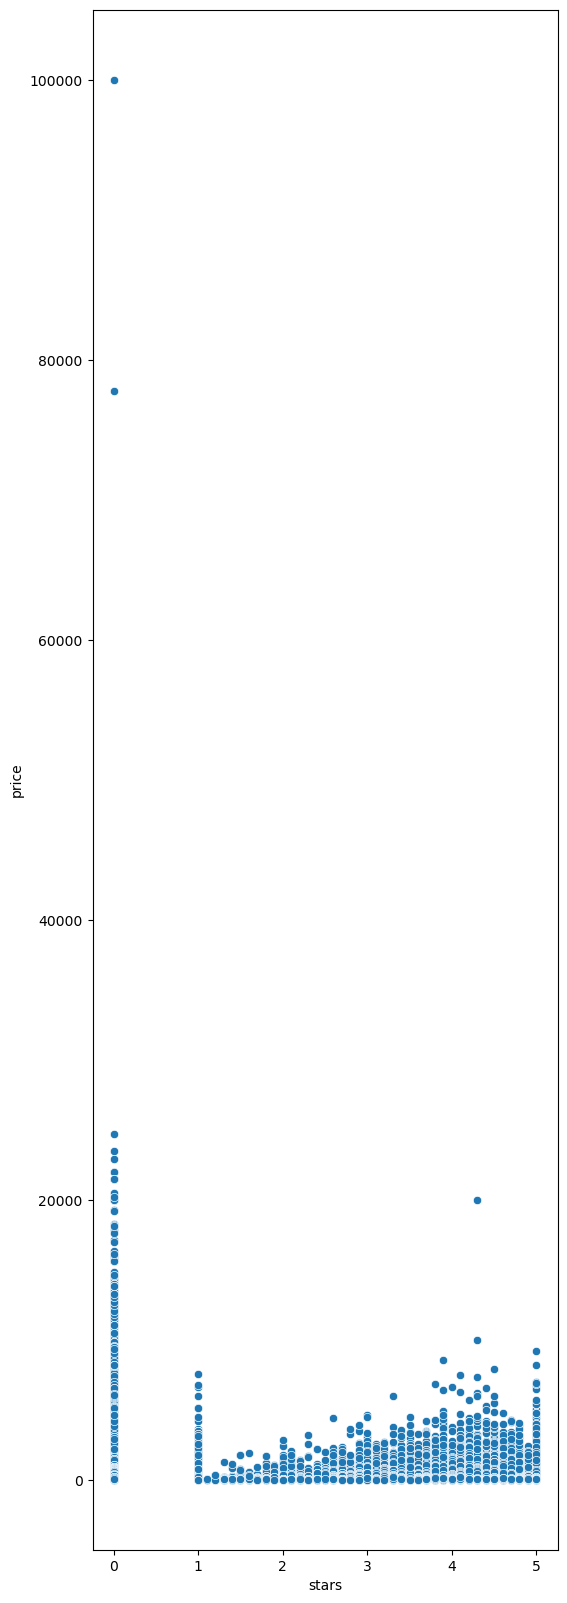

In [27]:
#Visualizations scatter plot
plt.figure(figsize=(6, 20))
sns.scatterplot(y='price', x='stars', data=data_AM_UK);

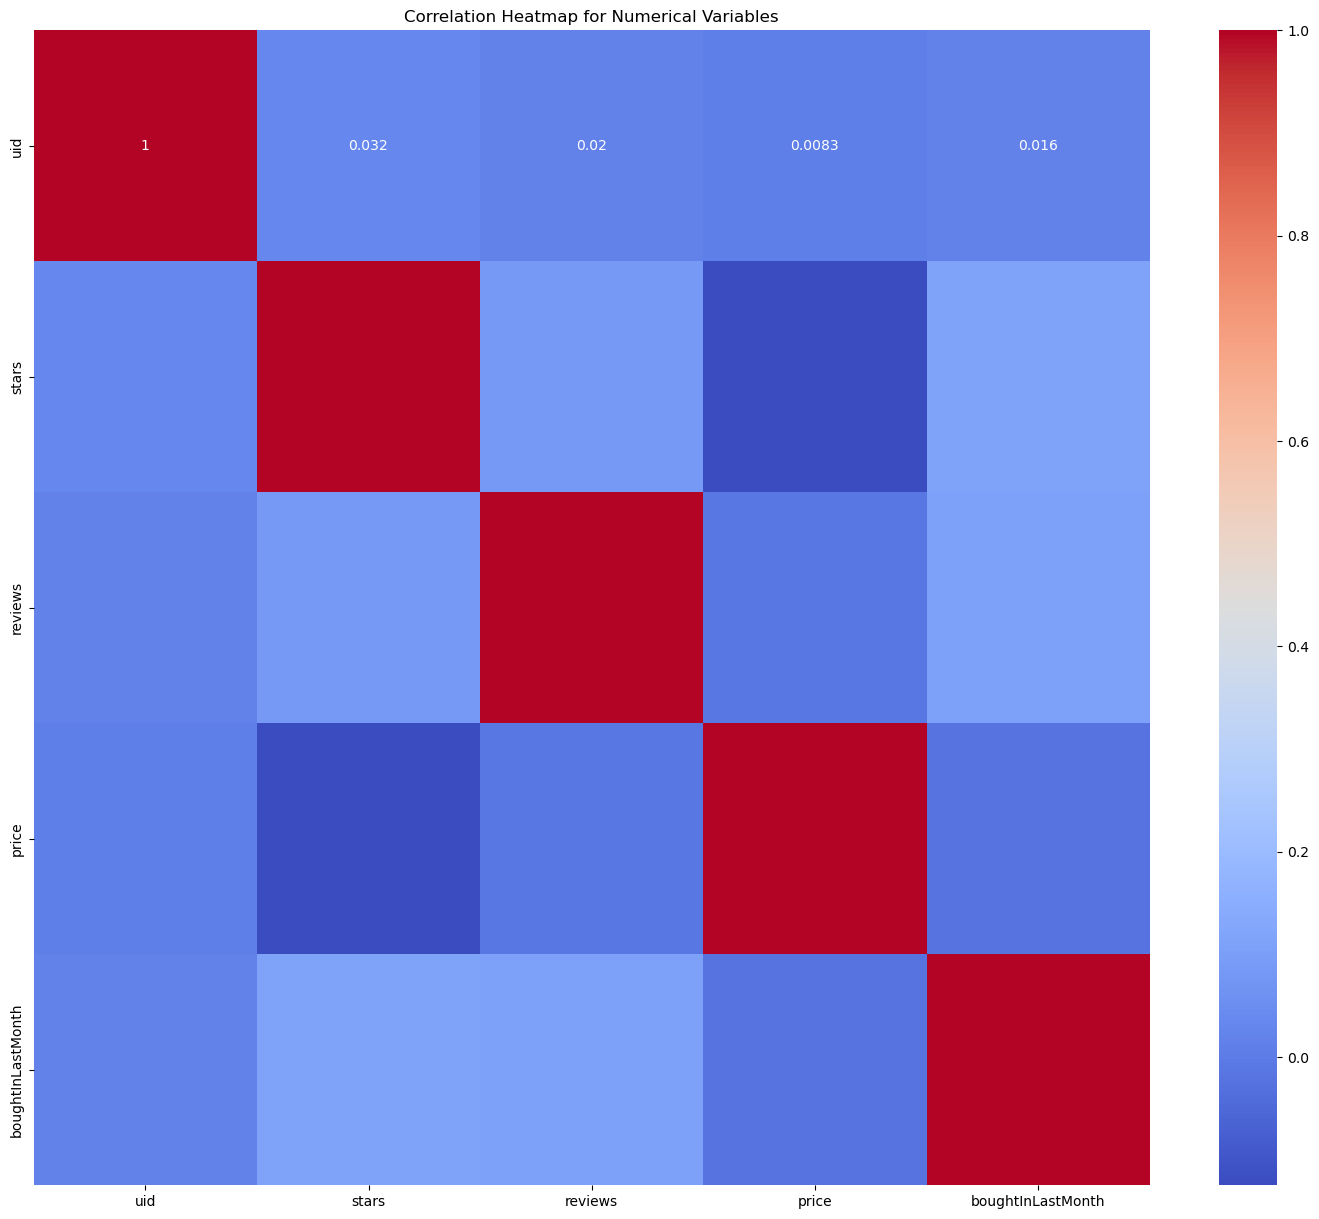

In [30]:
#Visualizations heatmap (no printing of the correlation values after 1st raw with my version of seaborn, display correlation_matrix to get them if needed )
data_AM_UK_numerical = data_AM_UK.select_dtypes(include=['number'])
correlation_matrix = data_AM_UK_numerical.corr()
plt.figure(figsize=(18, 15))
# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

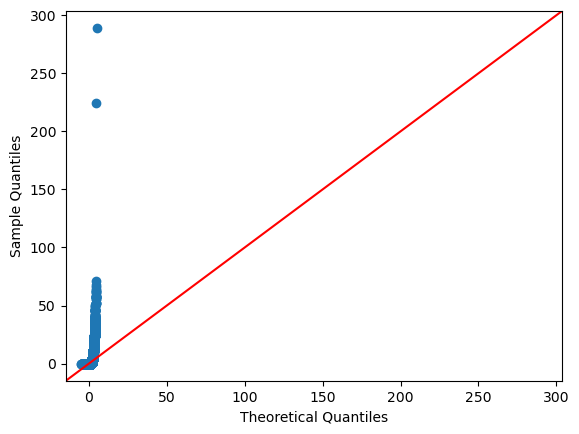

In [31]:
#Prices QQ plot
import statsmodels.api as sm
sm.qqplot(data_AM_UK['price'].values, fit=True, line='45')
plt.show()

In [ ]:
The QQ Plot of prices shows that its distribution deviates strongly from a normal distribution.